# Decision Tree Bagging - a simple example


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.utils import resample
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

def true_fun(X):
    return np.cos(1.5 * np.pi * X) +  - 0.5*np.ones_like(X)

np.random.seed(2)
n_samples = 20
sig = 0.3; # noise level
X = np.sort(np.random.rand(n_samples))
Xgrid = np.linspace(0,1,200)
y_true = true_fun(Xgrid)
y = true_fun(X) + np.random.randn(n_samples) * sig
X = X[:, np.newaxis]

In [ ]:
tree1 = DecisionTreeRegressor()
tree1.fit(X,y)
yp = tree1.predict(Xgrid.reshape(-1,1))

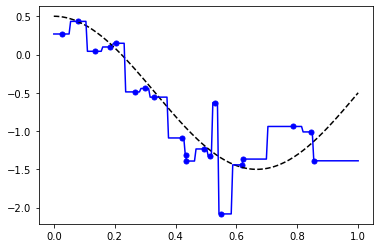

In [ ]:
plt.plot(X,y,'b.',markersize=10)
plt.plot(Xgrid,y_true,'k--')
plt.plot(Xgrid,yp,'b')
#plt.savefig('lec5_bagging01.pdf')
#files.download("lec5_bagging01.pdf")

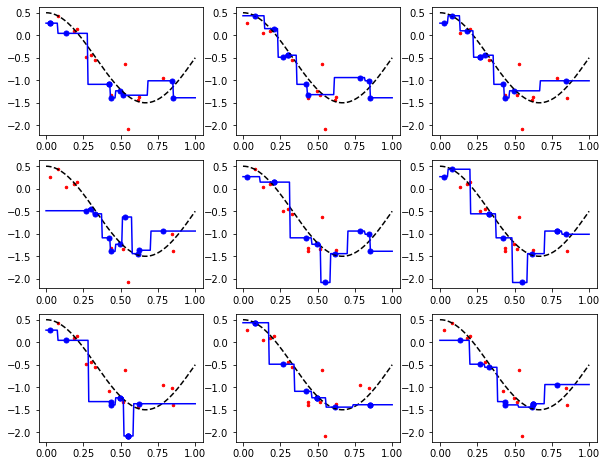

In [ ]:
fig = plt.figure(figsize=(10,8))
N=9
yres = np.zeros((len(Xgrid),N))
for i in range(N):
    xboot, yboot = resample(X,y,n_samples=10)
    treeboot = DecisionTreeRegressor()
    treeboot.fit(xboot,yboot)
    yb = treeboot.predict(Xgrid.reshape(-1,1))
    yres[:,i] = yb
    ax = fig.add_subplot(3, 3, i+1)
    ax.plot(X,y,'r.',markersize=5)
    ax.plot(xboot,yboot,'b.',markersize=10)
    ax.plot(Xgrid,true_fun(Xgrid),'k--')
    ax.plot(Xgrid,yb,'b-')
#fig.savefig('lec5_bagging02.pdf')
#files.download("lec5_bagging02.pdf")

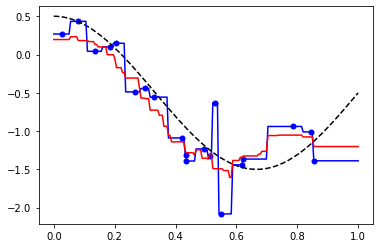

In [ ]:
ymean = np.mean(yres,axis=1)
plt.plot(X,y,'b.',markersize=10)
Xgrid = np.linspace(0,1,200)
plt.plot(Xgrid,y_true,'k--')
plt.plot(Xgrid,yp,'b')
plt.plot(Xgrid,ymean,'r')
#plt.savefig('lec5_bagging03.pdf')
#files.download("lec5_bagging03.pdf")

In [ ]:
J = sum((yp-y_true)**2)/len(y_true)
J_bagging = sum((ymean-y_true)**2)/len(y_true)
print('Decision Tree with all data gives Squared Error = ','{:5.4f}'.format(J))
print('Bagging with 9 smaller trees gives Squared Error = ','{:5.4f}'.format(J_bagging))

Decision Tree with all data gives Squared Error =  0.1339
Bagging with 9 smaller trees gives Squared Error =  0.0726
